# Data Analysis: Bike Sharing Dataset

## Menentukan Pertanyaan Bisnis

- Apa dampak cuaca terhadap jumlah maksimal sepeda yang dipinjam?
- Seperti apa volume maksimal sepeda yang dipinjam antara hari biasa dan hari libur?
- Berapa rata-rata tertinggi pengguna sepeda yang terdaftar perjamnya?

## Import Semua Packages/Library yang Digunakan
proyek ini menggunakan beberapa library yaitu
- numpy
- pandas
- matplotlib
- seaborn

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Pada tahap ini, saya menggumpulkan data-data yang dibutuhkan

### 1. Memuat Table day
Memuat table day menjadi dataframe



In [31]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 2. Memuat Table hour
memuat table hour menjadi dataframe

In [32]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data
Menilai kualitas data yang akan digunakan

### 1. Menilai Data day_df
Pertama kita akan memeriksa tipe data pada day_df menggunakan method info()

In [33]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari pemeriksaan diatas kita dapat menyimpulkan beberapa hal:
1. terdapat kesalahan pada tipe data dteday yang seharusnya menggunakan tipe data datetime.
2. tidak terdapat missing value

Selanjutnya kita akan memeriksa apakah pada day_df terdapat duplikasi data dengan method duplicated()

In [34]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


Dari pemeriksaan di atas day_df tidak mempunyai duplikasi data

Selanjutnya kita akan memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df menggunakan method describe()

In [35]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


day_df memiliki parameter yang normal

### 2. Menilai Data hour_df
Selanjutnya kita akan memeriksa tipe data pada day_df menggunakan method info()

In [36]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari pemeriksaan diatas kita dapat menyimpulkan hal yang sama dengan data day_df:
1. terdapat kesalahan pada tipe data dteday yang seharusnya menggunakan tipe data datetime.
2. tidak terdapat missing value

Selanjutnya kita akan memeriksa apakah terdapat duplikasi data menggunakan method duplicated() dan juga memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df menggunakan method describe()

In [37]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi data:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


hour_df memiliki parameter yang normal

### Cleaning Data
pada tahapan ini kita akan membersihkan masalah yang ditemukan pada proses asessing data

### 1. Membersihkan Data day_df
Berdasarkan hasil proses assessing data kita menemukan beberapa masalah pada day_df yaitu kesalahan tipe data pada kolom dteday dan inaccurate value

- Menangani kesalahan tipe data

Untuk menangani kesalahan ini, kita akan mengganti tipe data pada kolom dteday menjadi datetime menggunakan function to_datetime() dan mengecek hasilnya menggunakan method info()

In [38]:
dteday_col = ["dteday"]

for column in dteday_col:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## 2. Membersihkan Data hour_df
Berdasarkan hasil proses assessing data kita menemukan beberapa masalah pada hour_df yaitu kesalahan tipe data pada kolom dteday dan inaccurate value

- Menangani kesalahan tipe data

Untuk menangani kesalahan ini, kita akan mengganti tipe data pada kolom dteday menjadi datetime menggunakan function to_datetime() dan mengecek hasilnya menggunakan method info()

In [39]:
dteday_col = ["dteday"]

for column in dteday_col:
  hour_df[column] = pd.to_datetime(hour_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)


### Pertanyaan Bisnis
- Apa dampak cuaca terhadap jumlah maksimal sepeda yang dipinjam?
- Seperti apa volume maksimal sepeda yang dipinjam antara hari biasa dan hari libur?
- Berapa rata-rata tertinggi pengguna sepeda yang terdaftar perjamnya?

### 1. Explorasi Data day_df
Pertama kita akan melihat rangkuman parameter statistik dari Day_df menggunakan method describe()

In [40]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Kemudian kita akan melihat jumlah pelanggan casual dan registered pada berbagai situasi cuaca

In [41]:
day_df.groupby(by="weathersit").agg({
    "cnt": "max",
    "casual" :"max",
    "registered" : "max"
})

,cnt,casual,registered
weathersit,,,
1,8714,3410,6946
2,8362,3155,6844
3,4639,1264,4324


Pada pivot table diatas dapat kita simpulkan bahwa pengguna sepeda berubah-ubah seiring dengan situasi cuaca berikut:
- Cerah (1)
- Berawan & Berkabut (2)
- Hujan (3)

Pengguna sepeda pada cuaca hujan cenderung lebih sedikit dari cuaca lainnya

Selanjutnya kita akan melihat perbedaan volume sepeda yang dipinjam pada hari biasa dan hari libur

In [42]:
day_df.groupby(by="holiday").agg({
    "cnt": "max",
    "casual" : "max",
    "registered" : "max"
})

,cnt,casual,registered
holiday,,,
0,8714,3410,6946
1,7403,3065,5172


Pada pivot table diatas dapat kita simpulkan bahwa pengguna sepeda harian pada hari libur(1) lebih sedikit dari pada hari biasa(0)

### 2. Explorasi Data hour_df
Pertama kita akan melihat rangkuman parameter statistik dari hour_df menggunakan method describe()

In [43]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kemudian kita akan melihat pengguna sepeda yang terdaftar setiap jamnya

In [44]:
hour_df.groupby(by="hr").agg({
    "registered": "mean",
})

,registered
hr,
0,43.739669
1,26.871547
2,18.097902
3,9.011478
4,5.098996
5,18.478382
6,71.882759
7,201.009629
8,337.331499


Data pengguna yang terdaftar setiap jamnya cenderung berubah-ubah

### 3. Melakukan proses merge dataframe
Melakukan merge dataframe day_df dan hour_df dengan menggunakan method merge()

In [45]:
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="dteday",
    right_on="dteday",
    suffixes = ("_h", "_d")
)
all_df.head()

,instant_h,dteday,season_h,yr_h,mnth_h,hr,holiday_h,weekday_h,workingday_h,weathersit_h,...,weekday_d,workingday_d,weathersit_d,temp_d,atemp_d,hum_d,windspeed_d,casual_d,registered_d,cnt_d
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


## Visualization & Explanatory Analysis
Pada bagian ini kita akan menampilkan dan menjelaskan data dalam bentuk visual

### Pertanyaan 1: Apa dampak cuaca terhadap jumlah maksimal sepeda yang dipinjam?

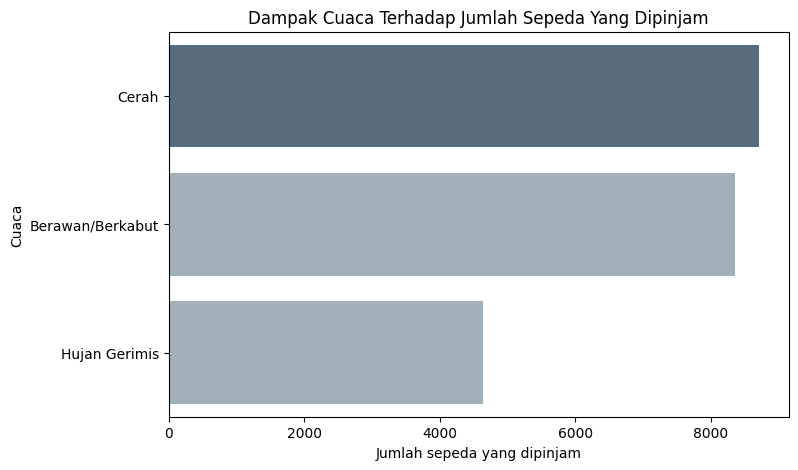

In [46]:
weathersit_max = all_df.groupby(by="weathersit_d").agg({
    "cnt_d": "max",
})

plt.figure(figsize=(8, 5))
colors = ["#526D82", "#9DB2BF", "#9DB2BF"]
sns.barplot(
    y="weathersit_d",
    x="cnt_d",
    orient="h",
    data=weathersit_max,
    hue="weathersit_d",
    palette=colors,
    legend=False
)

# plt.barh(y=day_df["weathersit"], width=day_df["cnt"])
plt.xlabel("Jumlah sepeda yang dipinjam")
plt.ylabel("Cuaca")
plt.title("Dampak Cuaca Terhadap Jumlah Sepeda Yang Dipinjam")
plt.yticks([0, 1, 2], ["Cerah", "Berawan/Berkabut", "Hujan Gerimis"])
plt.show()

Terdapat perbedaan signifikan pada jumlah sepeda yang dipinjam disaat cuaca hujan gerimis dibandingkan cuaca lain

### Pertanyaan 2: Seperti apa volume maksimal sepeda yang dipinjam antara hari biasa dan hari libur?

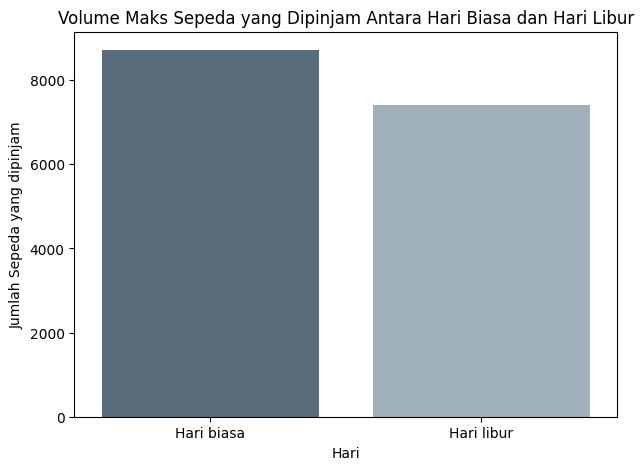

In [47]:
holiday_max = all_df.groupby(by="holiday_d").agg({
    "cnt_d": "max",
})

plt.figure(figsize=(7, 5))
colors = ["#526D82", "#9DB2BF"]
sns.barplot(
    x="holiday_d",
    y="cnt_d",
    data=holiday_max,
    hue="holiday_d",
    palette=colors,
    legend=False

)

# plt.bar(x=day_df["holiday"], height=day_df["cnt"])
plt.xlabel("Hari")
plt.ylabel("Jumlah Sepeda yang dipinjam")
plt.title("Volume Maks Sepeda yang Dipinjam Antara Hari Biasa dan Hari Libur")
plt.xticks([0, 1], ["Hari biasa", "Hari libur"])
plt.show()

Volume sepeda yang dipinjam lebih banyak pada hari biasa dibandingkan dengan hari libur

### Pertanyaan 3: Berapa rata-rata tertinggi pengguna sepeda yang terdaftar perjamnya?

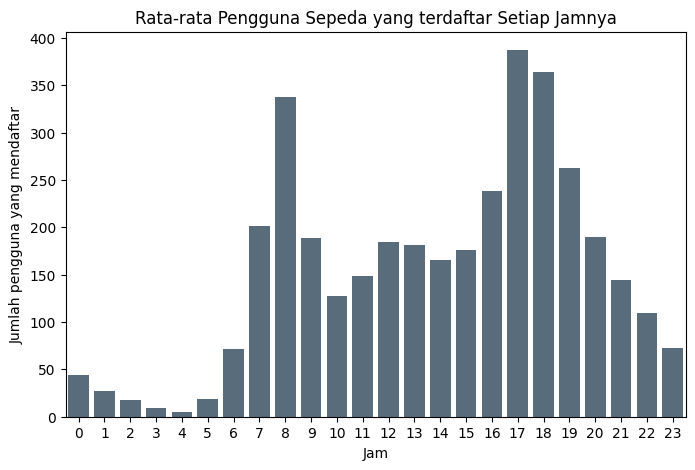

In [48]:
reg_hour = all_df.groupby(by="hr").agg({
    "registered_h": "mean",
})

plt.figure(figsize=(8, 5))
colors = ["#526D82"]
sns.barplot(
    x="hr",
    y="registered_h",
    data=reg_hour,
    hue="hr",
    palette=colors*24,
    legend=False
)

plt.xlabel("Jam")
plt.ylabel("Jumlah pengguna yang mendaftar")
plt.title("Rata-rata Pengguna Sepeda yang terdaftar Setiap Jamnya")
plt.show()

Rata-rata jumlah tertinggi dari pengguna sepeda yang terdaftar terjadi pada sore hari tepatnya pada jam 17.00

## Conclusion

1. Pertanyaan: Apa dampak cuaca terhadap jumlah maksimal sepeda yang dipinjam?

  Conclusion: Dampak cuaca sangat memengaruhi jumlah sepeda yang dipinjam. Berikut ini adalah jumlah maksimal sepeda yang dipinjam:
  - Cerah: 8714 sepeda
  - Berawan/berkabut: 8362 sepeda
  - Hujan Gerimis: 4639 sepeda

2. Pertanyaan: Seperti apa volume maksimal sepeda yang dipinjam antara hari biasa dan hari libur?

  Conclusion: Volume maksimal sepeda yang dipinjam memuncak pada hari biasa sebanyak 8714 sepeda, berbanding secara signifikan dengan hari libur yaitu sebanyak 7403 sepeda

3. Pertanyaan: Berapa rata-rata tertinggi pengguna sepeda yang terdaftar perjamnya?

  Conclusion: Rata-rata tertinggi pengguna sepeda yang terdaftar terjadi pada pukul:
  - 17.00 sebanyak 387 pengguna
  - 18.00 sebanyak 364 pengguna
  - 08.00 sebanyak 337 pengguna

In [49]:
all_df.to_csv("alldf_clean.csv", index=False)